In [2]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import cv2
from os import listdir,path

In [3]:
img_path = './images/'
img_files = listdir(img_path)
len(img_files) , len(set(img_files))

(155, 155)

(480, 640, 3)


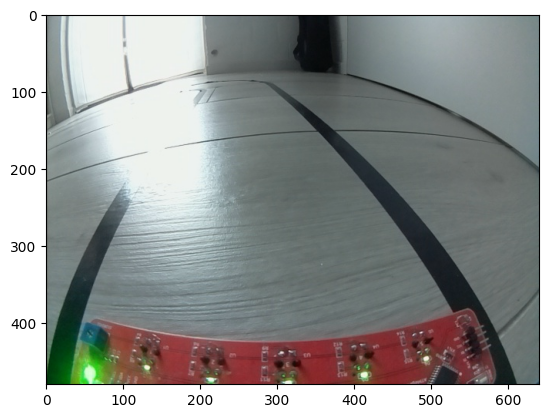

In [4]:
# Ansicht eines Beispielbildes (rot grün vertauscht)
img_example = cv2.imread(img_path + img_files[10])
plt.imshow(img_example)
print(img_example.shape)

In [5]:
# Einlesen aller Bilder -> Kontrolle der Anzahl
imgs = np.array([cv2.imread(img_path+i) for i in img_files])
imgs.shape

(155, 480, 640, 3)

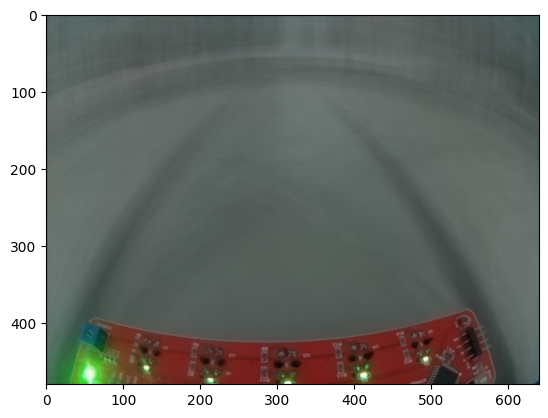

In [6]:
# Mittleres Bilder der Trainingsbilder
img_mean = imgs.mean(axis=0).astype('int')
plt.imshow(img_mean)

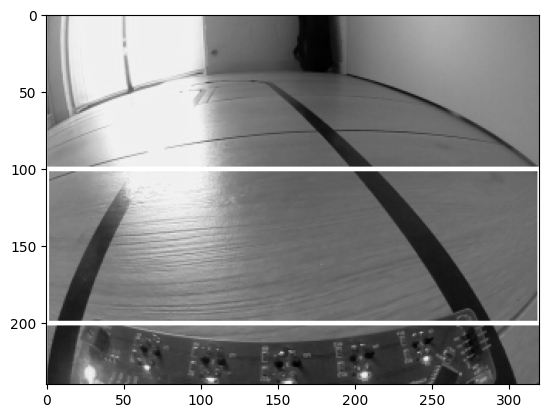

In [31]:
# Testweise Bildbearbeitung
sp=(0,200)
ep=(320,100)
dim = (320,240)
interpolation = cv2.INTER_AREA
img_example_x = img_example.copy()
img_example_x = cv2.cvtColor(img_example_x,cv2.COLOR_BGR2GRAY)
img_example_x= cv2.resize(img_example_x,dim,interpolation)
#plt.imshow(img_example_x)
plt.imshow(cv2.rectangle(img_example_x,sp,ep,(255,255,0),2),cmap='gray')

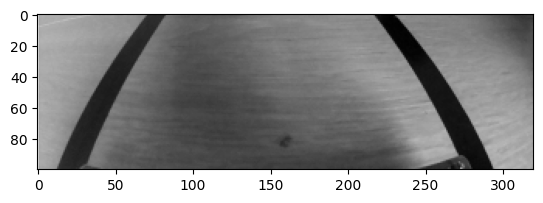

In [10]:
# Definition einer Funktion zur Vorverarbeitung eines einzelnen Trainingsbildes
# Dieser Verarbeitungsschritte müssen bei der Anwendungung des neuronlen Netzes
# am RPi ebenfalls in identischer Form durchgeführt werden.
def transform_image(img):
    dim = (320,240)
    interpolation = cv2.INTER_AREA
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # Verwendung von Graustufenbildern
    img = cv2.resize(img,dim,interpolation) #  Anpassung der Bildgröße
    img = img[100:200,:] # Ausschneiden eines Teilbildes
    return img

plt.imshow(transform_image(imgs[0]),cmap='gray')

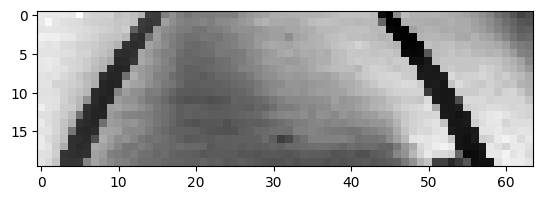

In [11]:
# Alternative mit Verkleinerung der Bilder
# Definition einer Funktion zur Vorverarbeitung der Trainingsbilder
def transform_image_small(img):
    dim = (64,48)
    interpolation = cv2.INTER_AREA
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # Verwendung von Graustufenbildern
    img = cv2.resize(img,dim,interpolation) #  Anpassung der Bildgröße
    #img = img[100:200,:] # Ausschneiden eines Teilbildes
    img = img[20:40,:] # Ausschneiden eines Teilbildes
    return img

plt.imshow(transform_image_small(imgs[0]),cmap='gray')

In [12]:
# Laden und Vorverarbeiten aller Trainingsbilder (groß)
imgs_large = np.array([transform_image(cv2.imread(img_path+i)) for i in img_files])
imgs_large.shape

(155, 100, 320)

In [13]:
imgs_small = np.array([transform_image_small(cv2.imread(img_path+i)) for i in img_files])
imgs_small.shape

(155, 20, 64)

In [17]:
# Position des Lenkwinkels im Filenamen (abhängig von gewählter Vorgehensweise)
x = img_files[0]
print(x)
print('-',x[-7:-4],'-') # Raspberry/Linux
print('-',x[50:-4],'-') # Windows

IMG_SRC_65a1ac49_20240422_16-10-41_0168_S000_A091.jpg
- 091 -
-  -


In [18]:
angles = np.array([int(i[-7:-4]) for i in img_files]) # Extrahieren der Lenkwinkel aus dem Dateinamen

<AxesSubplot:>

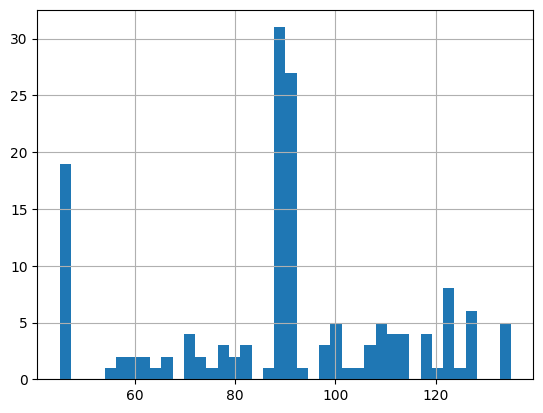

In [19]:
# Betrachtung der Verteilung der Lenkwinkel in den Trainingsdaten
# -> typischerweise nicht symmetrisch
pd.Series(angles, name ='angles').hist(bins = 40)

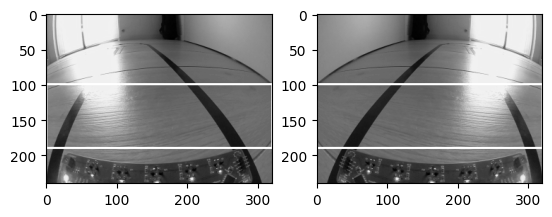

In [22]:
# Test Spiegeln eines Bildes
#img_example_x_mirrored = img_example_x[:,::-1] # alternativ mit cv2.flip
img_example_x_mirrored = cv2.flip(img_example_x,1) # alternativ mit cv2.flip
plt.figure()
plt.subplot(121)
plt.imshow(img_example_x,cmap='gray')
plt.subplot(122)
plt.imshow(img_example_x_mirrored,cmap='gray')

In [23]:
# Spiegeln und Zusammenfügen der ungespiegelten und der gespiegelten Trainingsbilder
# Große Bilder
imgs_large_mirrored = imgs_large[:,:,::-1]
print(imgs_large.shape)
print(imgs_large_mirrored.shape)
imgs_large_all = np.concatenate((imgs_large,imgs_large_mirrored))
print(imgs_large_all.shape)

(155, 100, 320)
(155, 100, 320)
(310, 100, 320)


In [24]:
# Zusammenfügen der ungespiegelten und der gespiegelten Trainingsbilder
# Kleine Bilder
imgs_small_mirrored = imgs_small[:,:,::-1]
print(imgs_small.shape)
print(imgs_small_mirrored.shape)
imgs_small_all = np.concatenate((imgs_small,imgs_small_mirrored))
print(imgs_small_all.shape)

(155, 20, 64)
(155, 20, 64)
(310, 20, 64)


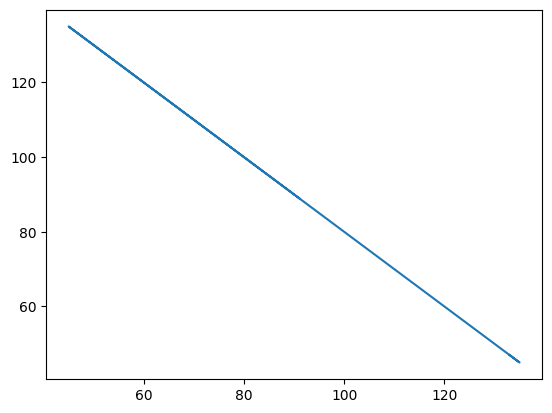

In [25]:
angles_mirrored = [-a+180 for a in angles] # Spiegeln der Winkel

# Kontrolle
plt.plot(angles,angles_mirrored)
angles_all = np.hstack((angles,angles_mirrored)) # Zusammenführen der ungespiegelten und gespiegelten Winkel

In [26]:
angles_all

array([ 91,  73, 114,  90,  45,  89,  90,  89,  81, 135,  87,  79, 105,
       135,  89,  89,  91,  91,  89,  45,  77,  83,  89,  97,  91, 125,
        91, 126,  81,  91,  89, 123, 135,  89, 107,  89, 121, 111,  67,
        89,  77, 123, 126, 109,  91,  65, 123,  45, 103, 114,  71,  90,
       126, 101,  45, 119,  89,  89,  71,  89, 126,  45,  61,  93,  45,
        91,  55, 111,  45,  90,  91,  45,  90, 107,  89,  89, 117,  89,
        45,  89, 114,  90,  45,  90,  75, 126,  45,  89, 111,  59, 117,
        90,  89,  79,  67,  45,  45, 109,  71, 111, 108, 101,  99,  45,
        45, 123,  89,  57, 123,  89, 113,  77, 107,  90,  97,  89,  89,
        71,  99,  91,  91,  45,  97,  89,  91,  91,  90,  45, 123,  89,
        99,  89,  57,  89, 133,  89,  91,  45, 123,  89,  90, 109,  59,
       126,  91,  91, 123,  89,  73,  61, 108, 117,  45,  89, 133,  89,
       107,  66,  90, 135,  91,  90,  91,  99,  45,  93, 101,  75,  45,
        91,  91,  89,  89,  91, 135, 103,  97,  91,  83,  89,  5

<AxesSubplot:>

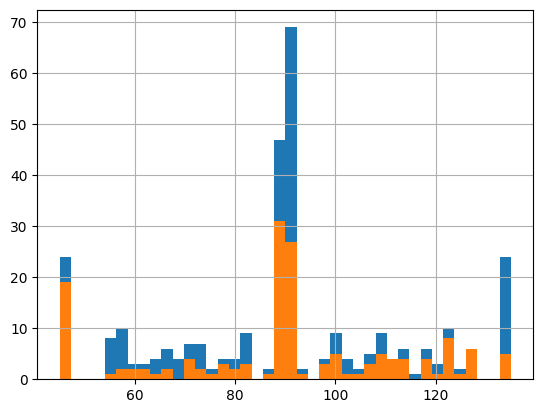

In [27]:
pd.Series(angles_all, name ='angles').hist(bins = 40)
pd.Series(angles, name ='angles').hist(bins = 40)

In [29]:
# Import notwendiger Klassen und Funktionen
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam

In [33]:
# Die Trainingsdaten sollen eine Shape erhalten, welche die Farbkanäle berücksichtigen...
# ... auch wenn in diesem Beispiele nur ein Farbkanal vorhanden ist.
n,h,w = imgs_large_all.shape
imgs_large_all_tf = imgs_large_all.reshape((n,h,w,1))
n,h,w,f = imgs_large_all_tf.shape
input_shape = (h,w,f)
print(input_shape)

(100, 320, 1)


In [34]:
# Erstellen des Netzes für die großen Bilder
# Keras Sequntial API
model = tf.keras.Sequential(name='dnn') 

# Convolution Layers 
# elu: Expenential Linear Unit, similar to leaky Relu 
model.add(Conv2D(24, (5, 5), strides=(2, 2), input_shape=input_shape, activation='elu')) 
model.add(Conv2D(36, (5, 5), strides=(2, 2), activation='elu'))
model.add(Conv2D(48, (5, 5), strides=(2, 2), activation='elu'))
model.add(Conv2D(64, (3, 3), activation='elu')) 
model.add(Dropout(0.2)) # more robustness 
model.add(Conv2D(64, (3, 3), activation='elu')) 

# Fully Connected Layers 
model.add(Flatten()) 
model.add(Dropout(0.2)) # more robustness 
model.add(Dense(100, activation='elu')) 
model.add(Dense(50, activation='elu')) 
model.add(Dense(10, activation='elu'))

# Output Layer: turning angle
model.add(Dense(1)) 

In [35]:
model.summary()

Model: "dnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 158, 24)       624       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 77, 36)        21636     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 37, 48)         43248     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 35, 64)         27712     
_________________________________________________________________
dropout (Dropout)            (None, 7, 35, 64)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 33, 64)         36928     
_________________________________________________________________
flatten (Flatten)            (None, 10560)             0       

In [36]:
# Die Trainingsdaten sollen eine Shape erhalten, welche die Farbkanäle berücksichtigen...
# ... auch wenn in diesem Beispiele nur ein Farbkanal vorhanden ist.
# Alternative für kleines Bild
n,h,w = imgs_small_all.shape
imgs_small_all_tf = imgs_small_all.reshape((n,h,w,1))
n,h,w,f = imgs_small_all_tf.shape
input_shape_small = (h,w,f)
print(input_shape_small)

(20, 64, 1)


In [37]:
# Alternative für kleinens Bild und normales NN
model_small = tf.keras.Sequential(name='dnn_dense') 

# Convolution Layers 
# elu: Expenential Linear Unit, similar to leaky Relu 
model_small.add(Conv2D(10, (2, 6), strides=(2, 3), input_shape=input_shape_small, activation='elu')) 
model_small.add(Conv2D(10, (2, 5), strides=(2, 2), activation='elu'))
model_small.add(Conv2D(10, (2, 4), strides=(2, 2), activation='elu'))
model_small.add(Conv2D(20, (2, 2), strides=(2, 2), activation='elu'))
# Fully Connected Layers 
model_small.add(Flatten()) 
#model_small.add(Dropout(0.2)) # more robustness 
#model_small.add(Dense(20, activation='elu')) 
model_small.add(Dense(10, activation='elu')) 
model_small.add(Dense(10, activation='elu')) 

# Output Layer: turning angle
model_small.add(Dense(1))

In [41]:
# Kontrolle der Architektur
model_small.summary()

Model: "dnn_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 10, 20, 10)        130       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 8, 10)          1010      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 3, 10)          810       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 1, 20)          820       
_________________________________________________________________
flatten_1 (Flatten)          (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                11

In [38]:
n,h,w = imgs_small_all.shape
print(imgs_small_all.shape)
imgs_small_all_tf_flat = imgs_small_all.reshape((n,h*w))
imgs_small_all_tf_flat.shape

(310, 20, 64)


(310, 1280)

In [39]:
# Alternative für kleinens Bild
# Erstellen des Netzes für das stark verkleinert Bild
# Die Größte des Netzes muss angepasst werden. (Anzahl der Schichten, Kernelsizes, Strides)
model_small_flat = tf.keras.Sequential(name='dnn_small') 
model_small_flat.add(Dense(100, input_shape=(imgs_small_all_tf_flat.shape), activation='elu')) 
model_small_flat.add(Dense(20, activation='elu')) 

# Output Layer: turning angle
model_small_flat.add(Dense(1))

In [40]:
# Kontrolle der Architektur
# Das kleine Modell hat bedeuteten weniger Parameter
model_small_flat.summary()

Model: "dnn_small"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 310, 100)          128100    
_________________________________________________________________
dense_8 (Dense)              (None, 310, 20)           2020      
_________________________________________________________________
dense_9 (Dense)              (None, 310, 1)            21        
Total params: 130,141
Trainable params: 130,141
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Auswahl der großen oder kleinen Bilder und des zugehörigen Modells
#imgs_all_tf= imgs_small_all_tf_flat
#model = model_small_flat
imgs_all_tf= imgs_small_all_tf
model = model_small

In [43]:
# Kontrolle und Reshapen der Trainingsdaten
print(angles_all.shape)
print(imgs_all_tf.shape)

(310,)
(310, 20, 64, 1)


In [44]:
# Split Trainings- und Testdaten
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(imgs_all_tf, angles_all, test_size = 0.2, random_state = 1)

In [45]:
# Korntrolle
print(X_train.dtype)
print(X_train.shape)
print(y_train.shape)
print(X_validate.dtype)
print(X_validate.shape)
print(X_validate.shape)

uint8
(248, 20, 64, 1)
(248,)
uint8
(62, 20, 64, 1)
(62, 20, 64, 1)


In [46]:
# Kompiliern des Modells und Wahl von Fehlerfunktion und Optimizer
model.compile(loss ='mse', optimizer=Adam(lr=0.002))
val_loss = []
loss = []

In [47]:
# Training
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs= 50,
    verbose=1,
    validation_data=(X_validate,y_validate)
)
loss.extend(history.history['loss'])
val_loss.extend(history.history['val_loss'])

2024-04-23 10:38:15.274041: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-04-23 10:38:15.287477: W tensorflow/core/platform/profile_utils/cpu_utils.cc:116] Failed to find bogomips or clock in /proc/cpuinfo; cannot determine CPU frequency


Epoch 1/50
8/8 [==============================] - 4s 148ms/step - loss: 8972.3526 - val_loss: 7938.0625
Epoch 2/50
8/8 [==============================] - 0s 39ms/step - loss: 6649.5767 - val_loss: 2935.5862
Epoch 3/50
8/8 [==============================] - 0s 38ms/step - loss: 2304.8330 - val_loss: 1417.4037
Epoch 4/50
8/8 [==============================] - 0s 37ms/step - loss: 1219.9658 - val_loss: 1314.5598
Epoch 5/50
8/8 [==============================] - 0s 37ms/step - loss: 1213.7821 - val_loss: 1249.8362
Epoch 6/50
8/8 [==============================] - 0s 37ms/step - loss: 997.8789 - val_loss: 1035.0057
Epoch 7/50
8/8 [==============================] - 0s 36ms/step - loss: 943.9601 - val_loss: 970.6136
Epoch 8/50
8/8 [==============================] - 0s 36ms/step - loss: 875.1617 - val_loss: 927.1598
Epoch 9/50
8/8 [==============================] - 0s 36ms/step - loss: 827.1796 - val_loss: 832.0556
Epoch 10/50
8/8 [==============================] - 0s 36ms/step - loss: 710.625

Text(0.5, 1.0, 'Training - Loss Function')

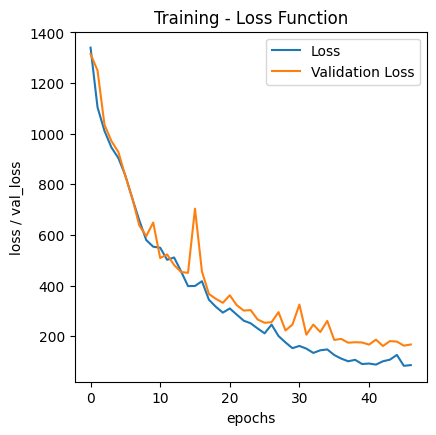

In [48]:
skip=3
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(loss[skip:], label='Loss')
plt.plot(val_loss[skip:], label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss / val_loss')
plt.legend()
plt.title('Training - Loss Function')